<b>Exercício 2</b>

In [5]:
# imports packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Exibe as images passadas como parametro
def show_subplots_image(image_array_ssi, image_title, nrow_ssi, ncol_ssi, fig_size_array_ssi, cmap_ssi=None):
    fig, axes = plt.subplots(nrow_ssi, ncol_ssi, figsize=fig_size_array_ssi)
    for ax, image_ssi, title in zip(axes.flatten(), image_array_ssi, image_title):
        ax.axis('off')
        ax.set_title(title)
        fig.tight_layout()
        ax.imshow(image_ssi, cmap=cmap_ssi)

a) Escreva uma função que realize a filtragem espacial de uma imagem. Essa função terá 2 parâmetros de entrada:  a imagem a ser transformada e o filtro a ser utilizado.

In [7]:
# realiza a filtragem espacial aplicando o filtro na imagem
def filtragem_espacial(image_fe:np.array, filtro_fe:np.array):
    padding_size = (int(filtro_fe.shape[0]/2), int(filtro_fe.shape[1]/2))
    imagem_transicao = np.copy(np.pad(image_fe, padding_size, 'constant', constant_values=(0)))
    imagem_filtrada = np.zeros(image_fe.shape)
    
    for i in range(padding_size[0], imagem_transicao.shape[0] - padding_size[0]):
        for j in range(padding_size[1], imagem_transicao.shape[1] - padding_size[1]):
            if i - 1 < image_fe.shape[0] and j - 1 < image_fe.shape[1]:
                imagem_filtrada[i - 1, j - 1] = int(np.sum((imagem_transicao[i-padding_size[0]:i+padding_size[0]+1,j-padding_size[1]:j+padding_size[1]+1].flatten())*(filtro_fe.flatten())))
    imagem_final = cv2.normalize(imagem_filtrada,None,alpha=np.min(imagem_filtrada), 
                                beta=np.max(imagem_filtrada), norm_type=cv2.NORM_MINMAX)
    return imagem_final

b) Aplique os filtros abaixo na imagem da Lena (que foi enviada com o trabalho). Compare os resultados obtidos para cada um dos filtros. Com base nestes resultados, qual o tipo de filtro (passa-alta, passa
baixa, passa-faixa, etc.)  que está sendo utilizado em cada caso e qual o efeito de cada filtro na imagem.

In [8]:
# carrega a imagem da lenna
image_exercicio_2 = cv2.imread('imagens/lenna.png', cv2.IMREAD_GRAYSCALE)
IMAGE_SIZE = [12,12]

In [9]:
# carrega os filtros para o exercício
filter_list_exercicio_2b = [
                            np.array(np.dot((1/9),[[1,1,1],[1,1,1],[1,1,1]])),
                            np.array(np.dot((1/16),[[1,2,1],[2,4,2],[1,2,1]])),
                            np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),
                            np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),
                            np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
                        ]

# Título dos gráficos
filter_list_exercicio_2b_titles = ['Imagem Original',
                                   'Filtro de Média 1/9',
                                   'Filtro de Média 1/16',
                                   'Laplaciano com 5 no centro',
                                   'Laplaciano com 8 no centro',
                                   'Último filtro']

In [18]:
# Aplicar o filtro na imagem usando os filtros acima e Agrega a imagem original
image_filtered_list = \
    np.array([filtragem_espacial(image_exercicio_2, filter_2b) for filter_2b in filter_list_exercicio_2b])
image_filtered_list = np.concatenate(([image_exercicio_2], image_filtered_list))

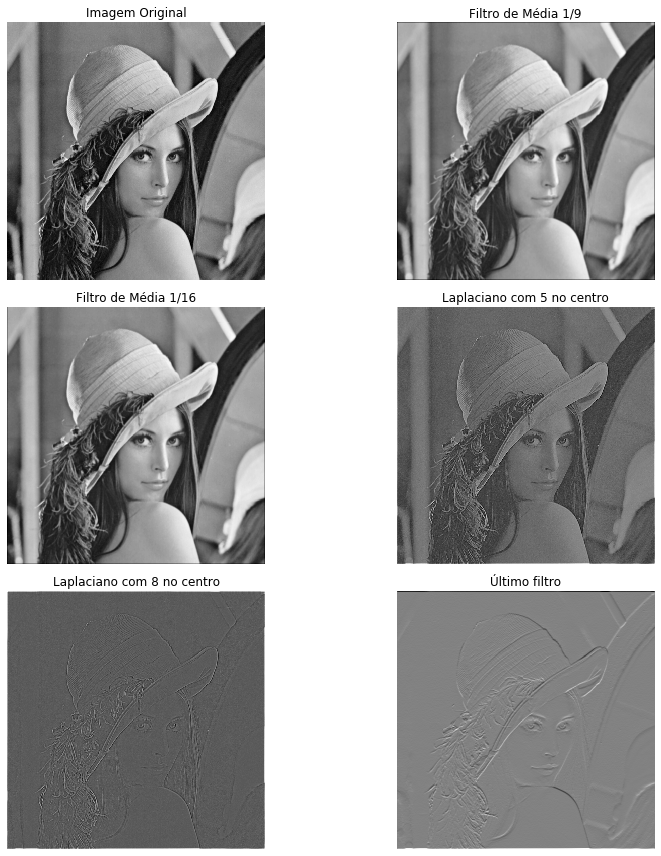

In [19]:
# exibe as imagens finais
show_subplots_image(image_filtered_list, filter_list_exercicio_2b_titles, 3, 2, IMAGE_SIZE, 'gray')

c) O filtro 1 possui tamanho 3x3. O que aconteceria se aumentássemos o tamanho do filtro para 11x11, 17x17 ou 35x35? De que forma o tamanho do filtro afeta a imagem?

In [61]:
# Carrega os filtros de média multiplicado por 1/9 com vários tamanhos de matrix
filter_list_exercicio_2c = np.array([np.dot((1/9), np.ones((3,3))),
                            np.dot((1/9), np.ones((11,11))),
                            np.dot((1/9), np.ones((17,17))),
                            np.dot((1/9), np.ones((35,35)))])

# Carregas os títulos dos gráficos
ilter_list_exercicio_2c_titles = ['Filtro 3 x 3', 
                                  'Filtro 11 x 11', 
                                  'Filtro 17 x 17', 
                                  'Filtro 35 x 35']

In [62]:
# Aplicar o filtro na imagem usando os filtros acima
imagem_filtrada_list_exercicio_2c = \
    [filtragem_espacial(image_exercicio_2, filtro_2c) for filtro_2c in filter_list_exercicio_2c]

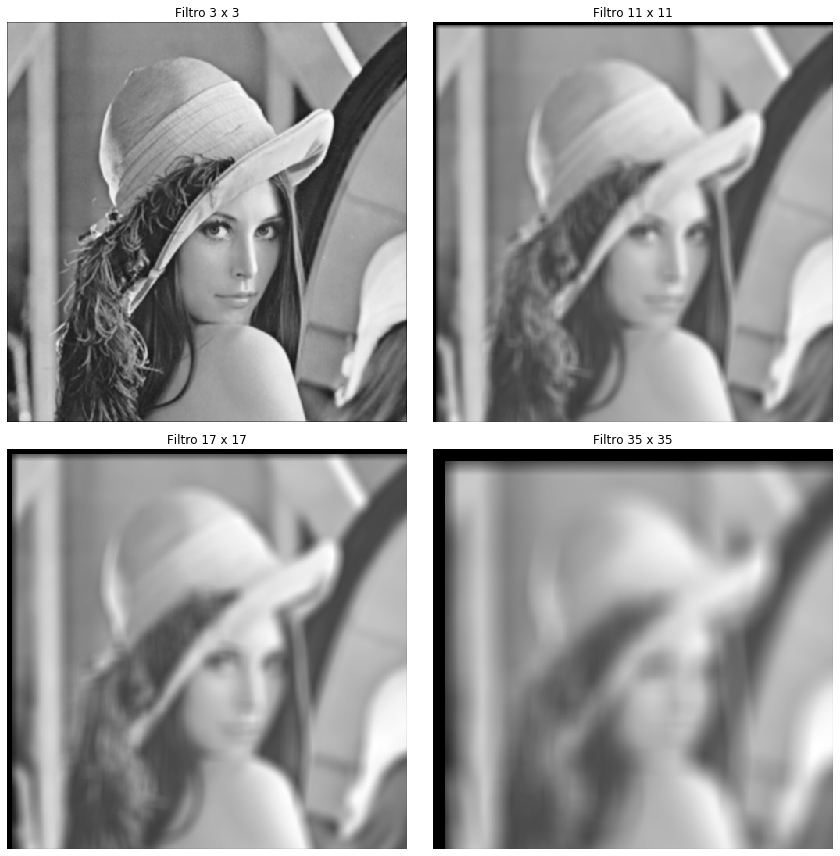

In [63]:
# Show images
show_subplots_image(imagem_filtrada_list_exercicio_2c, ilter_list_exercicio_2c_titles, 2, 2, IMAGE_SIZE, 'gray')